In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
#from tqdm.notebook import tqdm
import os
import re
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
import tensorflow as tf

In [ ]:
# Load the CSV dataset
dataset = pd.read_csv('/content/drive/MyDrive/dataset-all.csv')
dataset.head(5)

,Unnamed: 0,image_id,caption,comparison,indication,findings,impression,mesh,height,width,Image_path
0,0,CXR3695_IM-1845-1001.png,Two views of the chest,XXXX,Shortness of breath,The cardiac silhouette size is at the upper li...,"1. Mild central vascular prominence, XXXX cong...",Pulmonary Congestion/mild,420,512,/content/drive/MyDrive/dataset-iu/dataset-iu-i...
1,1,CXR3695_IM-1845-2001.png,Two views of the chest,XXXX,Shortness of breath,The cardiac silhouette size is at the upper li...,"1. Mild central vascular prominence, XXXX cong...",Pulmonary Congestion/mild,624,512,/content/drive/MyDrive/dataset-iu/dataset-iu-i...
2,2,CXR3703_IM-1850-1001.png,"Chest 2 views dated XXXX, XXXX",None.,History of atrial fibrillation and cardioversi...,The XXXX examination consists of frontal and l...,No evidence of acute cardiopulmonary process.,normal,512,512,/content/drive/MyDrive/dataset-iu/dataset-iu-i...
3,3,CXR3703_IM-1850-2001.png,"Chest 2 views dated XXXX, XXXX",None.,History of atrial fibrillation and cardioversi...,The XXXX examination consists of frontal and l...,No evidence of acute cardiopulmonary process.,normal,547,512,/content/drive/MyDrive/dataset-iu/dataset-iu-i...
4,4,CXR3686_IM-1837-0001-0001.png,"PA and lateral chest, XXXX, XXXX XXXX XXXX","XXXX, XXXX","Hypoxia, aortic stenosis",NaN,Stable cardiomegaly. Improved aeration in the ...,Cardiomegaly Airspace Disease/lung/base/right ...,423,512,/content/drive/MyDrive/dataset-iu/dataset-iu-i...


In [ ]:
#drop the caption,comparison, indication,columns 
dataset.drop(['caption', 'comparison', 'indication'], inplace=True , axis=1)

In [ ]:
#resize all images into 224*224 shape. on  HOLD

In [ ]:
#drop the height,width columns
dataset.drop(['height', 'width'], inplace=True , axis=1)

In [ ]:
dataset.drop(['Unnamed: 0'], inplace=True , axis=1)
dataset.head(5)

,image_id,findings,impression,mesh,Image_path
0,CXR3695_IM-1845-1001.png,The cardiac silhouette size is at the upper li...,"1. Mild central vascular prominence, XXXX cong...",Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...
1,CXR3695_IM-1845-2001.png,The cardiac silhouette size is at the upper li...,"1. Mild central vascular prominence, XXXX cong...",Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...
2,CXR3703_IM-1850-1001.png,The XXXX examination consists of frontal and l...,No evidence of acute cardiopulmonary process.,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...
3,CXR3703_IM-1850-2001.png,The XXXX examination consists of frontal and l...,No evidence of acute cardiopulmonary process.,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...
4,CXR3686_IM-1837-0001-0001.png,NaN,Stable cardiomegaly. Improved aeration in the ...,Cardiomegaly Airspace Disease/lung/base/right ...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...


In [ ]:
dataset.shape[0]

7470

Text(0, 0.5, 'Number of words')

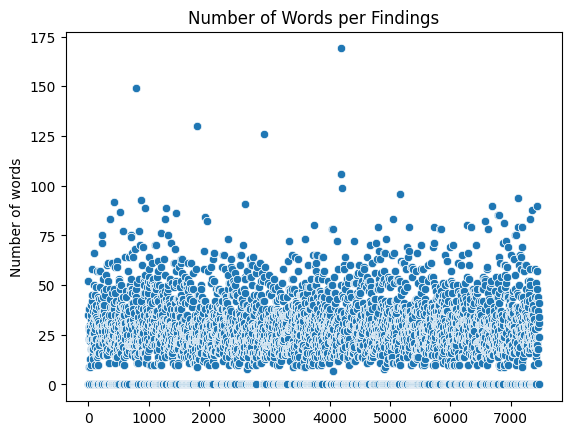

In [ ]:
#exploratory data analysis (skip for now, will do later)
dataset['findings']=dataset['findings'].fillna("")
l = [len(e.split()) for e in dataset['findings'].values]
plt.title('Number of Words per Findings')
sns.scatterplot(l)
plt.ylabel('Number of words')

Text(0, 0.5, 'Number of words')

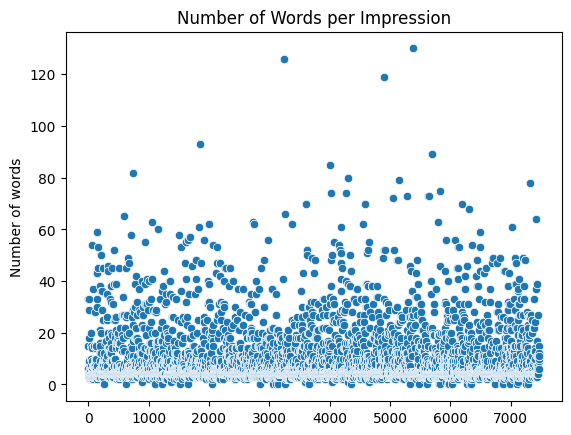

In [ ]:
#exploratory data analysis (skip for now, will do later)
dataset['impression']=dataset['impression'].fillna("")
l = [len(e.split()) for e in dataset['impression'].values]
plt.title('Number of Words per Impression')
sns.scatterplot(l)
plt.ylabel('Number of words')

In [ ]:
#add the impression and findings column to one column named 'Report'
dataset['report']= dataset['impression'] + "" + dataset['findings'] 
dataset.head(5)

,image_id,findings,impression,mesh,Image_path,report
0,CXR3695_IM-1845-1001.png,The cardiac silhouette size is at the upper li...,"1. Mild central vascular prominence, XXXX cong...",Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,"1. Mild central vascular prominence, XXXX cong..."
1,CXR3695_IM-1845-2001.png,The cardiac silhouette size is at the upper li...,"1. Mild central vascular prominence, XXXX cong...",Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,"1. Mild central vascular prominence, XXXX cong..."
2,CXR3703_IM-1850-1001.png,The XXXX examination consists of frontal and l...,No evidence of acute cardiopulmonary process.,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,No evidence of acute cardiopulmonary process.T...
3,CXR3703_IM-1850-2001.png,The XXXX examination consists of frontal and l...,No evidence of acute cardiopulmonary process.,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,No evidence of acute cardiopulmonary process.T...
4,CXR3686_IM-1837-0001-0001.png,,Stable cardiomegaly. Improved aeration in the ...,Cardiomegaly Airspace Disease/lung/base/right ...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,Stable cardiomegaly. Improved aeration in the ...


In [ ]:
dataset['report'].isnull().sum()

0

Text(0, 0.5, 'Number of words')

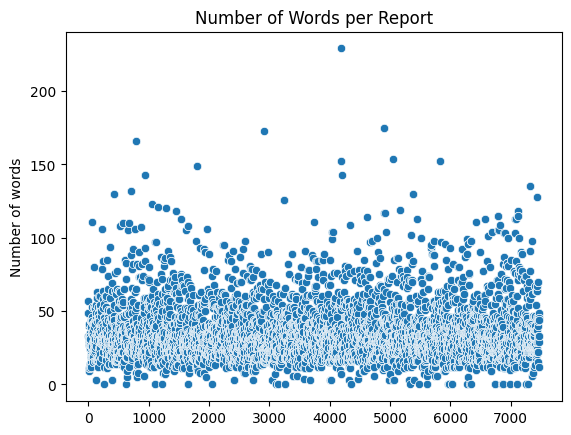

In [ ]:
l = [len(e.split()) for e in dataset['report'].values]
plt.title('Number of Words per Report')
sns.scatterplot(l)
plt.ylabel('Number of words')

In [ ]:
for i in range(dataset['report'].shape[0]):
  if dataset['report'][i] == '':
    dataset = dataset.drop(i)

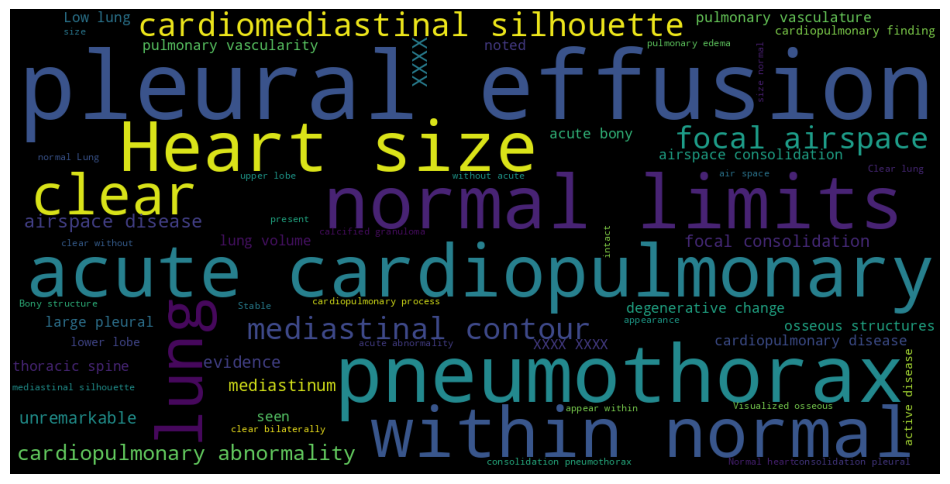

In [ ]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',max_words=800,max_font_size=60,scale=3,random_state=1 ).generate(' '.join(data.astype(str)))

    fig = plt.figure(1, figsize=(12, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(dataset['report'])

In [ ]:
dataset.drop(['findings','impression'], inplace=True , axis=1)

In [ ]:
#dataset.drop(['Unnamed: 0'], inplace=True , axis=1)

In [ ]:
dataset.head(5)

,image_id,mesh,Image_path,report
0,CXR3695_IM-1845-1001.png,Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,"1. Mild central vascular prominence, XXXX cong..."
1,CXR3695_IM-1845-2001.png,Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,"1. Mild central vascular prominence, XXXX cong..."
2,CXR3703_IM-1850-1001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,No evidence of acute cardiopulmonary process.T...
3,CXR3703_IM-1850-2001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,No evidence of acute cardiopulmonary process.T...
4,CXR3686_IM-1837-0001-0001.png,Cardiomegaly Airspace Disease/lung/base/right ...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,Stable cardiomegaly. Improved aeration in the ...


In [ ]:
#nlp methods from '7. Pre-processing text data and EDA' till the line 'After all these steps, now we are ready with our dataset for the model development.' 
#from medium article link
def lowercase(text):
    '''Converts to lowercase'''
    new_text = []
    for line in text:
        new_text.append(line.lower())
    return new_text

def decontractions(text):
    '''Performs decontractions in the doc'''
    new_text = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)

    return new_text

def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations: 
                line = line.replace(char, " ")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    '''Removes numbers and irrelevant text like xxxx*'''
    new_text = []
    for line in text:
        temp = re.sub(r'x*','',line)
        new_text.append(re.sub(r'\d','',temp))
    return new_text

def words_filter(text):
    '''Removes words less than 2 characters except no and ct'''
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        new_text.append(' '.join(e for e in temp2))
    return new_text

def multiple_fullstops(text):
    ''' Removes multiple full stops from the text'''
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        new_text.append(' '.join(e for e in temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'",'',line))
    return new_text

In [ ]:
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/final-dataset.csv')
dataset.head(5)

,Unnamed: 0,image_id,mesh,Image_path,report
0,0,CXR3695_IM-1845-1001.png,Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,mild central vascular prominence congestion . ...
1,1,CXR3695_IM-1845-2001.png,Pulmonary Congestion/mild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,mild central vascular prominence congestion . ...
2,2,CXR3703_IM-1850-1001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,no evidence acute cardiopulmonary process . th...
3,3,CXR3703_IM-1850-2001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,no evidence acute cardiopulmonary process . th...
4,4,CXR3686_IM-1837-0001-0001.png,Cardiomegaly Airspace Disease/lung/base/right ...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,stable cardiomegaly . improved aeration the l...


In [ ]:
#dataset['report'] = text_preprocessing(dataset['report'])

In [ ]:
dataset['mesh'].unique().tolist()[:20]

['Pulmonary Congestion/mild ',
 'normal ',
 'Cardiomegaly Airspace Disease/lung/base/right Catheters, Indwelling/left ',
 'Aorta/tortuous ',
 'Opacity/lung/upper lobe/right/patchy/mild Infiltrate/lung/upper lobe/right/mild ',
 'Infiltrate/lung/lingula/round ',
 'Emphysema ',
 'Pneumothorax/apex/left/small ',
 'Implanted Medical Device/aortic valve Calcinosis/aorta Pulmonary Edema/interstitial/mild Cardiomegaly/mild ',
 'Opacity/lung/middle lobe/right ',
 'Pulmonary Atelectasis/base/right Airspace Disease/lung/right Pleural Effusion/right Cardiomegaly ',
 'Calcinosis/lung/hilum/lymph nodes/left ',
 'Opacity/lung/base/left Cicatrix/lung/base/left ',
 'Lung/hypoinflation/mild ',
 'Opacity/lung/lower lobe/right/diffuse Pneumonia/lower lobe/right ',
 'Cardiomegaly Pleural Effusion/right/large Pulmonary Atelectasis/base/right Infiltrate/lung/base/right ',
 'Atherosclerosis/aorta Arthritis/thoracic vertebrae/mild Arthritis/severe ',
 'No Indexing ',
 'Pulmonary Atelectasis/base/left/mild Cica

In [ ]:
dataset['mesh'] = text_preprocessing(dataset['report'])

In [ ]:
dataset.head()

,image_id,mesh,Image_path,report
0,CXR3695_IM-1845-1001.png,pulmonarycongestionmild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,mildcentralvascularprominencecongestion hearts...
1,CXR3695_IM-1845-2001.png,pulmonarycongestionmild,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,mildcentralvascularprominencecongestion hearts...
2,CXR3703_IM-1850-1001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,noevidenceacutecardiopulmonaryprocess theeamin...
3,CXR3703_IM-1850-2001.png,normal,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,noevidenceacutecardiopulmonaryprocess theeamin...
4,CXR3686_IM-1837-0001-0001.png,cardiomegalyairspacediseaselungbaserightcathet...,/content/drive/MyDrive/dataset-iu/dataset-iu-i...,stablecardiomegaly improvedaerationtheleftlung...


In [ ]:
#path = '/content/drive/My Drive/final-dataset.csv'
#with open(path, 'w', encoding = 'utf-8-sig') as f:
  #dataset.to_csv(f)

In [ ]:
dataset['mesh'].isnull().sum()

0

In [ ]:
dataset['mesh'][0]

'Pulmonary Congestion/mild '

In [ ]:
# for i in range(15):
#   dataset['mesh'][i]